# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9382 Рыжих Роман, вариант 32.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши
Система n ОДУ первого порядка:
$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

ОДУ n-го порядка:
$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющим начальным условиям.

### Краевая задача 
Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.

## Постановка задачи

Дано дифференциальное уравнение:

$y''= f(x, y), a < x < b$ (1)

и граничные условия

$y(a) = y_a, y(b) = y_b.$ (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a, y'(a) = h$ (3)

План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при x = b является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного деления.


## Выполнение работы

$f(x,y) = \sqrt{xy+2}$

a = 0

b = 2

$y_a = 3$

$y_b = 3$

Общий вид задачи Коши:

$
\begin{cases}
    y''=f(x,y) \\
    y(a)=3 \\
    y'(a)=h \\
\end{cases}
$

Сведём дифференциальное уравнение к равносильной системе:

$
\begin{cases}
    y'= g \\
    g'= \sqrt{xy+2} \\
\end{cases}
$

[[ 3.          2.99900071  2.99800283 ...  4.93182353  4.93538539
   4.9389507 ]
 [-1.         -0.99858526 -0.99716945 ...  3.56013271  3.56357579
   3.56702062]]


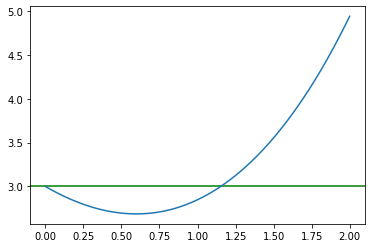

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

def fun(t,Y):
    return Y[1], (t*Y[0]+2)**0.5

a = 0
b = 2
y_a = 3
y_b = 3
#h_0 = -1.839957198
h_0 = -1

intervals = np.arange(0, 2, 0.001)
solve = solve_ivp(fun, (a, b), (y_a, h_0), t_eval=intervals)
print(solve.y)
plt.axhline(y=3, color='green', linestyle='-')
plt.plot(intervals, solve.y[0])

In [188]:
delta_h = 0.1
h_m = h_0
h_n = h_0
M = 500
check = solve.y[0][-1]
solve = solve_ivp(fun, (a, b), (y_a, h_n + delta_h), t_eval=intervals)
if (y_b <= solve.y[0][-1] <= check) or (y_b >= solve.y[0][-1] >= check):
    while M != 0 and solve.y[0][-1] <= y_b:
        M -= 1
        h_m = h_n
        h_n = h_m + delta_h
        solve = solve_ivp(fun, (a, b), (y_a, h_n), t_eval=intervals)

else:
    delta_h = -delta_h
    while M != 0 and solve.y[0][-1] >= y_b:
        M -= 1
        h_m = h_n
        h_n = h_m + delta_h
        solve = solve_ivp(fun, (a, b), (y_a, h_n), t_eval=intervals)

print(h_m, h_n)

-1.8000000000000007 -1.9000000000000008


Интервал, в котором находится искомая переменная h: [-1.8, -1,9]

In [189]:
solve_n = solve_ivp(fun, (a, b), (y_a, h_n), t_eval=intervals)
solve_m = solve_ivp(fun, (a, b), (y_a, h_m), t_eval=intervals)

while abs(solve_n.y[0][-1] - solve_m.y[0][-1]) > 0.001:
    h = (h_m + h_n)/2
    solve_h = solve_ivp(fun, (a, b), (y_a, h), t_eval=intervals)
    if (solve_h.y[0][-1] <= y_b <= solve_n.y[0][-1]) or (solve_h.y[0][-1] >= y_b >= solve_n.y[0][-1]):
        h_m = h
        solve_m = solve_ivp(fun, (a, b), (y_a, h_m), t_eval=intervals)
    else:
        h_n = h
        solve_n = solve_ivp(fun, (a, b), (y_a, h_n), t_eval=intervals)

print(solve_n.y[0][-1])
print(solve_m.y[0][-1])
print(h)

2.999374923324208
3.00028439170405
-1.840234375000001


h приблизительно равно -1.840234375000001

2.999374923324208


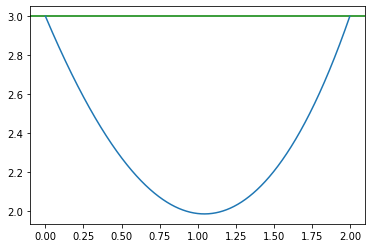

In [190]:
solve_final = solve_ivp(fun, (a, b), (y_a, h), t_eval=intervals)
plt.axhline(y=3, color='green', linestyle='-')
plt.plot(intervals, solve_final.y[0])
print(solve_final.y[0][-1])

## Выводы

Была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши. Сначала ОДУ второго порядка было сведено к системе из двух ОДУ первого порядка. Решена задача Коши при двух значений h, для которых значение на концевой точке $y(b)=3$ попадало в интервал $[y_{h_m},y_{h_n}]$. Затем методом половинного деления значение h было уточнено.